<a href="https://colab.research.google.com/github/PHUCTITAN20/D-Wave-Developer/blob/main/1ST_DAY_QUANTUM_COMPUTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4400.42
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

In [3]:
!pip install qiskit qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 9.5 MB/s eta 0:00:00


In [1]:
!pip install qiskit --upgrade

Verify the Installation

In [2]:
import qiskit
print(qiskit.__version__)

1.4.0


Check Qiskit Aer Installation

In [5]:
from qiskit_aer import Aer
print(Aer.backends())

[AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator')]


To check if qiskit-aer is using the CPU, run

In [6]:
from qiskit_aer import AerSimulator
simulator = AerSimulator()
print(simulator.available_devices())

('CPU',)


If your system has an NVIDIA GPU with CUDA support, qiskit-aer can leverage GPU acceleration

 Install qiskit-aer-gpu instead of qiskit-aer

In [3]:
!pip install qiskit-aer-gpu

Verify that the GPU backend is available

In [4]:
from qiskit_aer import AerSimulator
simulator = AerSimulator(method='statevector')
print(simulator.available_devices())

('CPU', 'GPU')


In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Create a simple quantum circuit
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

# Use the AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

# Run the circuit
job = simulator.run(compiled_circuit, shots=100000)
result = job.result()

# Print the measurement results
print(result.get_counts())

{'1': 50073, '0': 49927}


##Enable Qiskit Visualization in Colab

In [8]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=73250e2ffadf1270c607a60c91dbcdec46c116c19ee6899942f9b23af52ddb68
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [9]:
%matplotlib inline

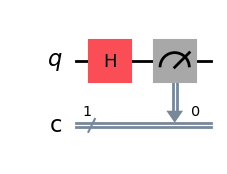

In [10]:
qc.draw('mpl')

##3-qubit version of the quantum circuit, where we apply a Hadamard gate to each qubit

In [11]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Create a 3-qubit quantum circuit with 3 classical bits
qc = QuantumCircuit(3, 3)

# Apply Hadamard gate to all qubits to create superposition
qc.h(0)
qc.h(1)
qc.h(2)

# Measure all qubits
qc.measure([0, 1, 2], [0, 1, 2])

# Use AerSimulator as the backend
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

# Run the circuit with 1024 shots
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Print the measurement results
counts = result.get_counts()
print(counts)

{'100': 124, '110': 143, '111': 139, '011': 112, '010': 117, '000': 129, '001': 115, '101': 145}


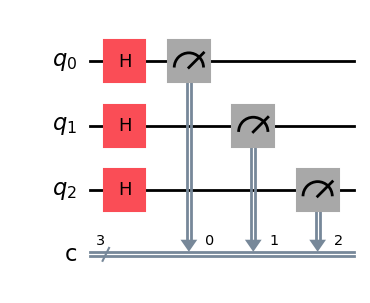

In [12]:
qc.draw('mpl')

3-Qubit GHZ State

In [13]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Create a quantum circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Step 1: Apply Hadamard gate to the first qubit to create superposition
qc.h(0)

# Step 2: Apply CNOT gates to entangle the qubits
qc.cx(0, 1)  # Entangle qubit 0 with qubit 1
qc.cx(1, 2)  # Entangle qubit 1 with qubit 2

# Step 3: Measure all qubits
qc.measure([0, 1, 2], [0, 1, 2])

# Use AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

# Run the circuit with 1024 shots
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Print the measurement results
counts = result.get_counts()
print(counts)

{'111': 490, '000': 534}


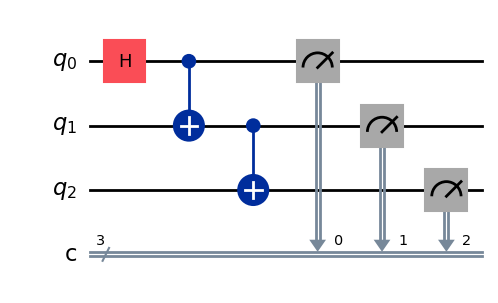

In [14]:
qc.draw('mpl')

 ##Simulating a 4-Qubit GHZ State with Noise

In [17]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit_aer.noise import depolarizing_error, thermal_relaxation_error

# Create a quantum circuit with 4 qubits and 4 classical bits
qc = QuantumCircuit(4, 4)

# Step 1: Apply Hadamard gate to the first qubit to create superposition
qc.h(0)

# Step 2: Apply CNOT gates to entangle all qubits
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)

# Step 3: Measure all qubits
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

# Define a noise model
noise_model = NoiseModel()

# Add depolarizing noise to all single-qubit gates
depol_noise_1q = depolarizing_error(0.02, 1)  # 2% probability of error for 1-qubit gates
depol_noise_2q = depolarizing_error(0.02, 2)  # 2% probability of error for 2-qubit gates


# Apply 1-qubit depolarizing noise to single-qubit gates ('h')
noise_model.add_all_qubit_quantum_error(depol_noise_1q, ['h'])
# Apply 2-qubit depolarizing noise to 2-qubit gates ('cx')
noise_model.add_all_qubit_quantum_error(depol_noise_2q, ['cx'])


# Add thermal relaxation error
thermal_noise = thermal_relaxation_error(50e3, 50e3, 0.01)  # Relaxation time of 50µs
noise_model.add_all_qubit_quantum_error(thermal_noise, ['measure'])

# Use AerSimulator with noise
simulator = AerSimulator(noise_model=noise_model)

# Transpile the circuit for the noisy simulator
compiled_circuit = transpile(qc, simulator)

# Run the circuit with 1024 shots
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Print the measurement results
counts = result.get_counts()
print(counts)

{'1101': 3, '0111': 1, '1011': 4, '0011': 8, '1000': 2, '1100': 7, '0100': 5, '1110': 6, '0010': 1, '0000': 508, '0001': 7, '1111': 472}


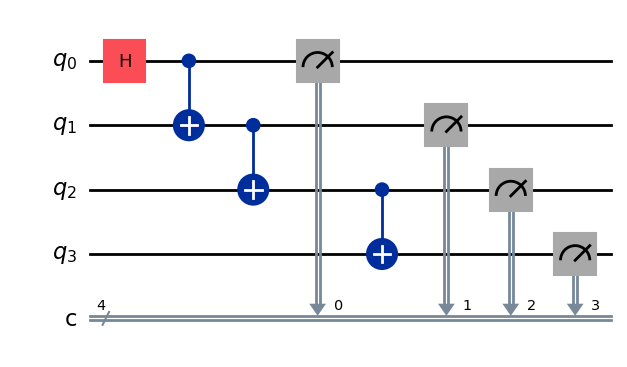

In [18]:
qc.draw('mpl')

 #Visualizing Results with a Histogram

In [20]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

# Plot the results
plot_histogram(result.get_counts())
plt.show()